# Моделювання систем. Лабораторна робота №1

## Краснощок Іван, ІПС-31

In [1]:
from itertools import chain

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def plot_graph(X, y, color=None):
    plt.figure(figsize=(15, 10))
    
    if color is None:
        plt.plot(X, y)
    else:
        plt.plot(X, y, color=color)
        
    plt.show()

Завантажуємо дані з файлу f6.txt (за номером у групі):

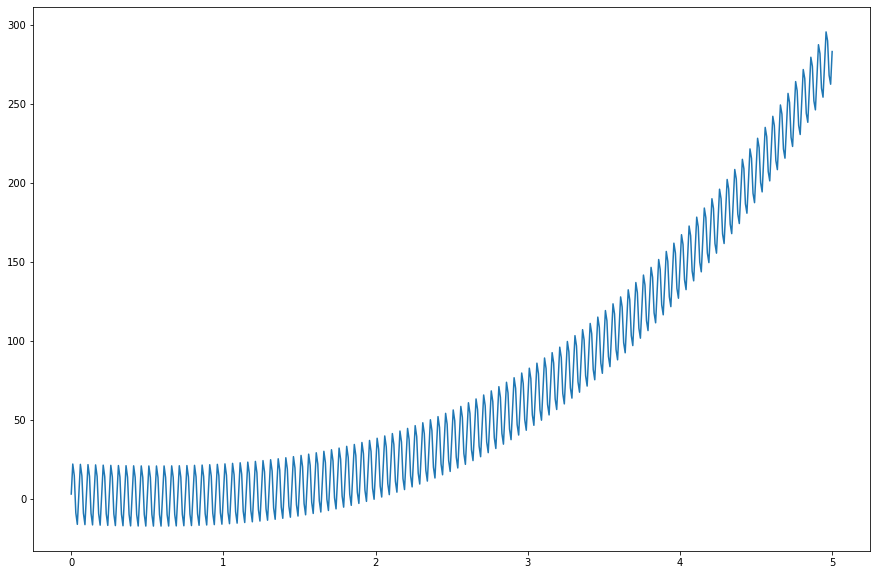

In [3]:
T = 5

y = np.fromfile('f6.txt', sep=' ')
X = np.linspace(0, T, len(y))

N = len(y)

plot_graph(X, y)

Застосовуємо перетворення Фур'є:

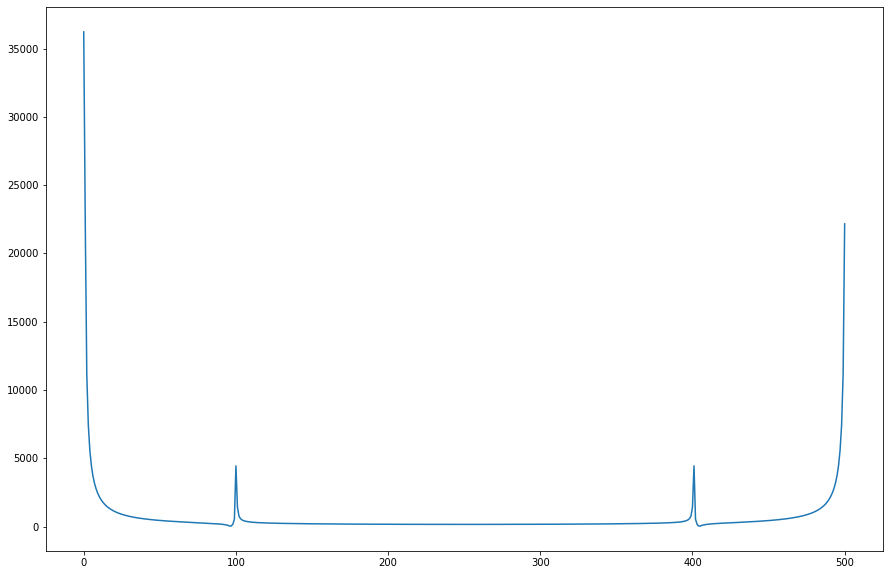

In [4]:
n_range = np.arange(N).reshape((N, 1))
abs_ft = np.abs(np.exp(-2j * np.pi * n_range @ n_range.T / N) @ y)

plot_graph(range(N), abs_ft)

Визначаємо точки локальних максимумів перетворення Фур'є:

In [5]:
abs_ft_half = abs_ft[:N // 2]

maximums, = np.where(np.logical_and.reduce(
    np.array([abs_ft_half > np.roll(abs_ft_half, i) for i in chain(range(-5, 0), range(1, 6))]), 
    axis=0
))
maximums = maximums[(maximums >= 5) & (maximums < N // 2 - 5)]
tuple(maximums)

(100,)

Маємо частоту найбільшого впливу:

In [6]:
f_max = maximums[0] / T
f_max

20.0

МНК:
![](IMG_20201012_233056.jpg)

Значення при коефіцієнтах a<sub>1</sub> - a<sub>5</sub>:

In [7]:
values = np.stack((X ** 3, X ** 2, X, np.sin(2 * np.pi * f_max * X), np.ones(N)), axis=1)
pd.DataFrame(values, columns=['a1', 'a2', 'a3', 'a4', 'a5']).head()

,a1,a2,a3,a4,a5
0,0.000000,0.0000,0.00,0.000000,1.0
1,0.000001,0.0001,0.01,0.951057,1.0
2,0.000008,0.0004,0.02,0.587785,1.0
3,0.000027,0.0009,0.03,-0.587785,1.0
4,0.000064,0.0016,0.04,-0.951057,1.0


Оцінюємо коефіцієнти функції розв'язуючи систему рівнянь (яка задовольняє умову мінімуму квадратичної похибки) методом оберненої матриці:

In [8]:
coef = np.linalg.inv(values.T @ values) @ (values.T @ y)
tuple(coef.round(4))

(2.0, 2.0, -4.0, 20.0, 3.0)

Підставляємо отримані коефіцінти у функцію, обчислюємо її значення:

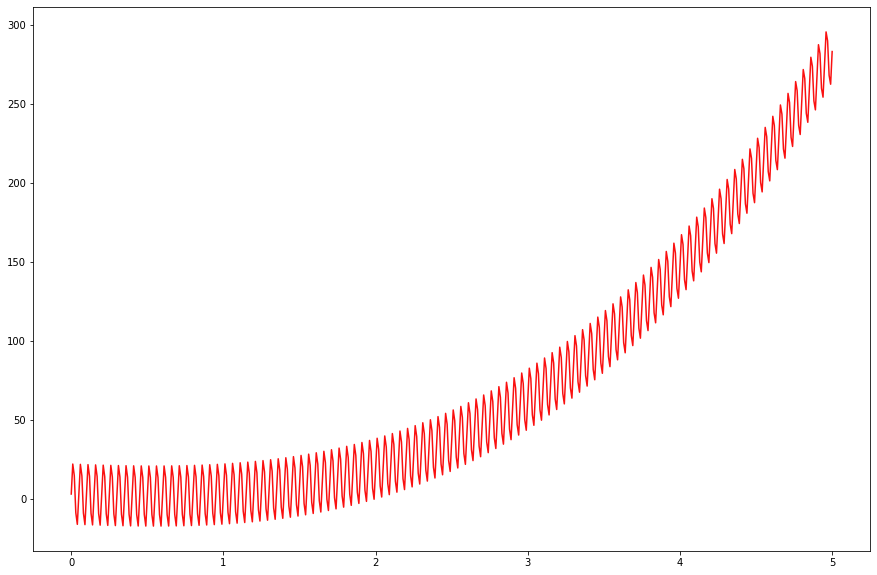

In [9]:
a1, a2, a3, a4, a5 = coef

func_approximated = np.vectorize(
    lambda t: a1 * t ** 3 + a2 * t ** 2 + a3 * t + a4 * np.sin(2 * np.pi * f_max * t) + a5
)

y_approximated = func_approximated(X)
plot_graph(X, y_approximated, color="#fa1010")

Обчислюємо квадратичну похибку отриманої функції:

In [10]:
np.sum((y - y_approximated) ** 2)

4.4985615773156284e-07